In [1]:
import warnings

import numpy as np

from HW1.coord_relaxer import LinearCoordRelaxer
from HW1.gradient_descent import gradient_descent
from HW1.visualize import draw_2D, draw_3D

Метод золотого сечения.
---

0. Берем отрезок [a, b]
1. Ставим на нем две точки `x1` и `x2` в пропорции золотого сечения.
    $x_1 = b - {b - a \over \phi}$
    $x_2 = a + {b - a \over \phi}$
2. Считаем значения в этих точках
    $y_1 = f(x_1)$
    $y_2 = f(x_2)$
3. Проверяем, если $|y_1 - y_2| < \varepsilon$, значит мы достаточно близко к ответу (с точностью $\varepsilon$). Здачит, завершаем программу.
4. Сдвигаем границы
    Если $y_1 \leq y_2 \Rightarrow b = x_2, x_2 = x_1, x_1 = b - {b - a \over \phi}, y_2 = y_1, y_1 = f(x_1)$
    Если $y_2 \leq y_1 \Rightarrow a = x_1, x_1 = x_2, x_2 = a + {b - a \over \phi}, y_1 = y_2, y_2 = f(x_2)$
5. Возвращаемся к пункту `3`

# Example 1

> $dim = 1$.
>
> $f(x) = {x^4 \over 1e7}$

In [2]:
def f(coord):
    return (coord[0] ** 4) / 1e7

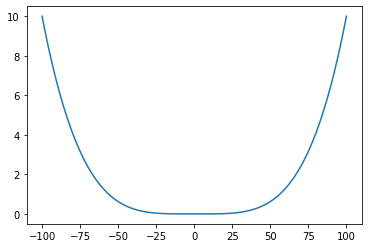

In [3]:
draw_2D(f)

[-8.86918877] 0.0006187790396929831
{'gradient_call_count': 1556, 'function_call_count': 28110, 'points': array([[array([-63.70833931]), 1.6473471836147826],
       [array([-62.67403759]), 1.5429458869619437],
       [array([-61.68929797]), 1.448235909916641],
       ...,
       [array([-8.87477143]), 0.000620338458508058],
       [array([-8.87197878]), 0.0006195580130412433],
       [array([-8.86918877]), 0.0006187790396929831]], dtype=object)}


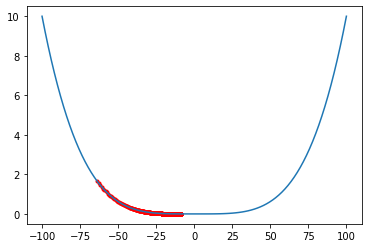

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    (x, y), meta = gradient_descent(f, 1, coord_relaxer=LinearCoordRelaxer(f, eps=1e-5))
    print(x, y)
    print(meta)

    draw_2D(f, meta["points"])

# Example 2

> $dim = 2$.
>
> $f(x, y) = sin(x / 20) * cos(e + y / 20)$

In [5]:
def f(coord):
    return np.sin(coord[0] / 20) * np.cos(np.e + coord[1] / 20)

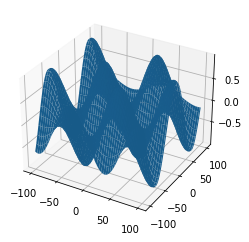

In [6]:
draw_3D(f)

[-31.41589772 -54.36560529] -0.9999999999977393
{'gradient_call_count': 77, 'function_call_count': 1311, 'points': array([[array([-16.56059762, -12.30335161]), 0.37384817759990424],
       [array([-15.0162032 , -15.15910228]), 0.2590800898030289],
       [array([-13.76711914, -17.998855  ]), 0.1556549506244866],
       [array([-12.91582856, -20.77012541]), 0.06545729805583965],
       [array([-12.67425421, -23.46200926]), -0.015166001572724488],
       [array([-12.76684201, -26.1254832 ]), -0.0942194695011013],
       [array([-13.33801804, -28.7728586 ]), -0.1775627735670247],
       [array([-14.35273626, -31.43891491]), -0.27082128219542156],
       [array([-15.74864778, -34.1352558 ]), -0.375934696243474],
       [array([-17.43319365, -36.83761788]), -0.4897942746187634],
       [array([-19.28608849, -39.48406863]), -0.6045000483494334],
       [array([-21.17282627, -41.98805283]), -0.7100173076849982],
       [array([-22.96876074, -44.26340238]), -0.798219027668643],
       [array([

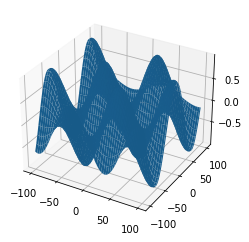

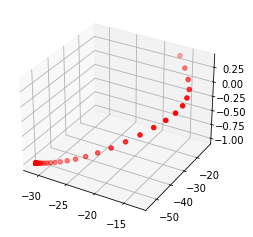

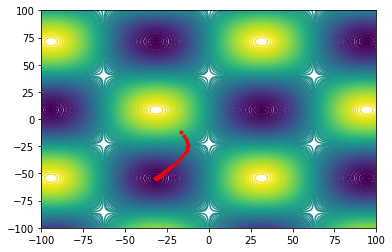

In [7]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    (xs, y), meta = gradient_descent(f, 2, lr=0.9, coord_relaxer=LinearCoordRelaxer(f, eps=1e-3))
    print(xs, y)
    print(meta)

    draw_3D(f, meta["points"])